In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

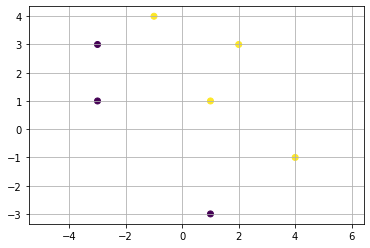

In [7]:
# dataset
dataset = np.array([[-1, 4, 1],
                   [4, -1, 1],
                   [1, -3, -1],
                   [1, 1, 1],
                   [-3, 3, -1],
                   [2, 3, 1],
                   [-3, 1, -1]])
data_points = dataset[:,0:2]
labels = dataset[:,2]

plt.scatter(data_points[:,0], data_points[:,1], c=labels)
plt.axis('equal')
plt.grid(True)
plt.show()

w: [-1.  4.]
w: [3. 3.]
w: [6. 0.]
w: [5. 4.]


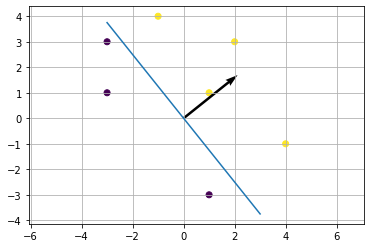

In [8]:
# task 1
w = perceptron(data_points, labels)

# vector w and hyperplane needed info
origin = np.array([0, 0])
x = np.linspace(-3,3)
slope = -1/((w[1]-origin[1])/(w[0]-origin[0]))
y = slope*x


# plot
plt.scatter(data_points[:,0], data_points[:,1], c=labels)
plt.quiver(*origin, w[0], w[1], scale=31)
plt.plot(x, y)
plt.axis('equal')
plt.grid(True)
plt.show()

In [9]:
# task 2
alpha = kernel_perceptron(data_points, labels)

print('alpha:', alpha)

alpha: [1. 1. 0. 0. 1. 0. 0.]


In [10]:
# task 3
u = np.array([2, -2])

u_label = kernel_perceptron_predict(data_points, labels, alpha, u)

print('u:', u, 'label:', u_label)

u: [ 2 -2] label: 1.0


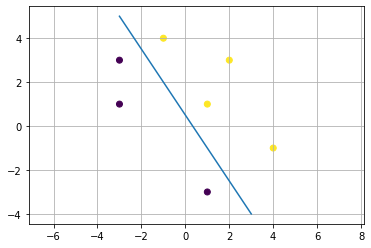

In [11]:
# task 4
# C is really big for hard margin svm
hard_margin_svm = svm.SVC(kernel="linear", C=1e10)
hard_margin_svm.fit(data_points, labels)

# hyperplane
w = hard_margin_svm.coef_[0]
slope = -w[0] / w[1]
x = np.linspace(-3, 3)
y = slope * x - (hard_margin_svm.intercept_[0]) / w[1]

# plot
plt.scatter(data_points[:,0], data_points[:,1], c=labels)
plt.plot(x, y)
plt.axis('equal')
plt.grid(True)
plt.show()

In [12]:
# perceptroon algorithm
def perceptron(data_points, labels):
    w = np.zeros(2)
    converged = False
    while not converged:
        counter = 0
        for i in range(len(data_points)):
            if np.sign(np.dot(w, data_points[i])) != labels[i]:
                counter += 1
                w = w + (labels[i] * data_points[i])
                print('w:', w)
            if counter == 0:
                converged = True
    return w

In [5]:
# kernel perceptron algorithm 
def kernel_perceptron(data_points, labels):
    
    alpha = np.zeros(len(data_points))
    
    for i in range(len(data_points)):
        y = 0
        for j in range(len(data_points)):
            y += alpha[j] * labels[j] * (np.dot(np.transpose(data_points[j]), data_points[i]))
        if np.sign(y) != labels[i]:
            alpha[i] += 1
            
    return alpha

In [6]:
# kernel perceptron predict
def kernel_perceptron_predict(data_points, labels, alpha, point):
    y = 0
    
    for i in range(len(data_points)):
        y += alpha[i] * labels[i] * (np.dot(np.transpose(data_points[i]), point))
            
    return np.sign(y)